# 20-2

## 1. 옥션 ebay쇼핑 웹사이트의 EBAY HOT DEAL 제품에 대한 페이지에서 (Link: http://ebay.auction.co.kr/plan/hotdeal ) 베스트 핫딜 제품의 제품명 및 가격을 웹 스크래핑으로 수집하여 상위 20개 제품을 데이터프레임으로 만들어 아래 예시처럼  출력하시오.



## 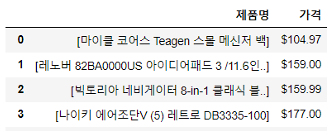

In [28]:
import requests
from bs4 import BeautifulSoup


url = 'https://es.auction.co.kr/plan/hotdeal'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

In [37]:
import pandas as pd


div = soup.find('div', class_ = 'content')

name_list = div.select(' div.con-box > dl > dt')[:20]
price_list = div.select('div.con-box > p > strong')[:20]

real_name = []
real_price = []
for name, price in zip(name_list, price_list):
    real_name.append(name.text)
    real_price.append(price.text)

df = pd.DataFrame({'name': real_name, 'price': real_price})
df

,name,price
0,[빈티지 마텔 바비 해피 패밀리 스마트..],$125.00
1,[반스앤노블 누크 글로우라이트4 32g],$99.99
2,[LG XO3QBK XBOOM 블루투스 스피커],$135.00
3,['47브랜드' LA다저스 모자],$25.99
4,[디올 DIOR STELLAIRE 4 여성용 선글라스 로..],$149.95
5,[마샬 - 미들턴 블루투스 휴대용 스피..],$236.99
6,[AHR 오픈페이스 모터사이클 헬멧 장착 ..],$79.90
7,[뉴발란스 남성 프레쉬 폼 스니커즈],$47.24
8,[디즈니 더 퍼스트 챕터 부스터 팩],$9.80
9,[리복 글라이드 신발],$43.71


# 21-1

## 1-1. penguins 데이터세트의 요약정보를 출력하시오. (seaborn에서 제공하는 penguins 데이터세트 활용)

In [45]:
import seaborn as sns

penguins = sns.load_dataset('penguins')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 1-2 요약정보를 통해 누락데이터가 있으면, 누락데이터를 포함하는 모든 행을 삭제한 후 요약정보를 다시 출력하시오.

In [46]:
penguins = penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


## 1-3. 열 이름 ‘body_mass_g’ 열은 펭귄의 체중을 수치형으로 표시하고 있는데, 이를 3개의 등간격 구간으로 분할하고 각 구간은 작은 체중부터 ‘light’, ‘medium’,  'heavy’의 범주형으로 변환하시오. 변환 결과는 열 이름 ‘weight’열로 만들어 ‘penguins’ 데이터프레임에 추가하고 기존 ‘body_mass_g’ 열은 삭제한 후, 전체 데이터프레임을 출력하시오

In [47]:
count, bid_dividers = np.histogram(penguins['body_mass_g'], bins = 3)

count, bid_dividers

(array([140, 135,  58]), array([2700., 3900., 5100., 6300.]))

In [48]:
bin_names = ['light', 'medium', 'heavy']

penguins['weight'] = pd.cut(
    x = penguins['body_mass_g'],
    bins = bid_dividers,
    labels = bin_names,
    include_lowest = True
)

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,weight
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,light
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,light
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,light
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,light
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,light
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,medium
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,medium
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,heavy
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,heavy


## 1-4. 3)번 결과에 이어서 이번에는 ‘weight’열을 One-Hot Encoding하여 ‘penguins’ 데이터프레임에 추가하고 기존 ‘weight’ 열은 삭제한 후, 전체 데이터프레임을 출력하시오.

In [49]:
origin_dummies = pd.get_dummies(penguins['weight'])
origin_dummies

,light,medium,heavy
0,True,False,False
1,True,False,False
2,True,False,False
4,True,False,False
5,True,False,False
...,...,...,...
338,False,True,False
340,False,True,False
341,False,False,True
342,False,False,True


In [50]:
penguins = pd.concat([penguins, origin_dummies], axis = 1)
penguins.drop('weight', axis = 1, inplace = True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,light,medium,heavy
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True,False,False
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True,False,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True,False,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True,False,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True,False,False
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,False,True,False
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,False,True,False
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,False,False,True
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,False,False,True


## 1-5. 열 이름 ‘species’ 열에서 펭귄 품종의 가능한 고유값을 모두 찾아 출력하도록 코딩하시오.

In [52]:
lista = penguins['species'].unique()
print(lista)

['Adelie' 'Chinstrap' 'Gentoo']


# 21-2

## 1-1. planet 데이터세트의 요약정보를 출력하시오. (seaborn에서 제공하는 planets 데이터셋 활용)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


## 1-2. 요약정보를 통해 누락데이터가 가장 많은 열을 삭제한 후 요약정보를 다시 출력하시오.

In [4]:
planets = planets.drop('mass', axis = 1)

planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   distance        808 non-null    float64
 4   year            1035 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 40.6+ KB


## 1-3. 남아있는 모든 누락 데이터는 각각의 열에 대한 중간값(median)으로 대체하고, 앞에서 40개 행을 출력하시오.

In [5]:
columns = ['orbital_period', 'distance']

for column in columns:
    median = planets[column].median()
    planets[column] = planets[column].fillna(median)

planets.head(40)

,method,number,orbital_period,distance,year
0,Radial Velocity,1,269.300000,77.40,2006
1,Radial Velocity,1,874.774000,56.95,2008
2,Radial Velocity,1,763.000000,19.84,2011
3,Radial Velocity,1,326.030000,110.62,2007
4,Radial Velocity,1,516.220000,119.47,2009
5,Radial Velocity,1,185.840000,76.39,2008
6,Radial Velocity,1,1773.400000,18.15,2002
7,Radial Velocity,1,798.500000,21.41,1996
8,Radial Velocity,1,993.300000,73.10,2008
9,Radial Velocity,2,452.800000,74.79,2010


## 1-4. 중복 데이터가 있는지 평가하는 코드를 작성하고, 중복데이터가 있으면 중복데이터를 제거하고 다시 평가하여 중복데이터가 없음을 확인하시오.

In [11]:
planets.duplicated().sum()

4

In [16]:
planets = planets.drop_duplicates()

planets

,method,number,orbital_period,distance,year
0,Radial Velocity,1,269.300000,77.40,2006
1,Radial Velocity,1,874.774000,56.95,2008
2,Radial Velocity,1,763.000000,19.84,2011
3,Radial Velocity,1,326.030000,110.62,2007
4,Radial Velocity,1,516.220000,119.47,2009
...,...,...,...,...,...
1030,Transit,1,3.941507,172.00,2006
1031,Transit,1,2.615864,148.00,2007
1032,Transit,1,3.191524,174.00,2007
1033,Transit,1,4.125083,293.00,2008


In [17]:
planets.duplicated().sum()

0

## 1-5. planet 데이터세트의 기초통계 정보를 출력하시오.

In [18]:
planets.describe()

,number,orbital_period,distance,year
count,1031.000000,1031.000000,1031.000000,1031.000000
mean,1.787585,1928.664846,214.999011,2009.069835
std,1.242641,25520.214365,643.453832,3.978946
min,1.000000,0.090706,1.350000,1989.000000
25%,1.000000,5.732710,38.010000,2007.000000
50%,1.000000,39.979500,55.250000,2010.000000
75%,2.000000,496.300000,130.720000,2012.000000
max,7.000000,730000.000000,8500.000000,2014.000000


## 1-6. 열 이름 distance는 거리를 수치형으로 표시하고 있는데, distance 변수의 최소값, 25%, 50%, 75% 사분위수 및 최대값을 경계값으로 하여 4개 구간으로 분할하고, 구간 분할된 변수명은 distance_level로 만들어 planets 데이터프레임에 추가하자. distance 열과 distance_level 열만 앞에서 20개 행을 출력하시오. 단, 구간별 라벨은 가까운 거리부터 A, B, C, D로 하자.

In [19]:
bin = [1.35, 38.01, 55.25, 130.72, 8500]

count, bin_dividers = np.histogram(planets['distance'], bins = bin)

count, bin_dividers

(array([257, 147, 368, 259]),
 array([1.3500e+00, 3.8010e+01, 5.5250e+01, 1.3072e+02, 8.5000e+03]))

In [22]:
planets['distance_level'] = pd.cut(
    x = planets['distance'],
    bins = bin_dividers,
    labels = ['A', 'B', 'C', 'D'],
    include_lowest = True
)

planets[['distance','distance_level']].head(20)

,distance,distance_level
0,77.40,C
1,56.95,C
2,19.84,A
3,110.62,C
4,119.47,C
5,76.39,C
6,18.15,A
7,21.41,A
8,73.10,C
9,74.79,C
